
## Исследование объявлений о продаже квартир

**Цели и задачи:** Определить рыночную стоимость объектов недвижимости. Задача — установить параметры для построения автоматизированной системы поиска аномалий и мошеннической деятельности.


### План выполнения работы:

1. Изучение данных

2. Предобработка данных
    - 2.1 Работа с пропусками в данных и изменение типов данных
    - 2.2 Поиск и удаление дубликатов
3. Добавление дополнительных данных в таблицу
    - 3.1 цена квадратного метра;
    - 3.2 день недели, месяц и год публикации объявления;
    - 3.3 этаж квартиры с вариантами "первый, последний, другой";
    - 3.4 соотношения жилой и кухонной к общей площади

4. Исследовательский анализ данных
    - 4.1 Изучение параметров: площадь, цена, число комнат, высота потолков
    - 4.2 Изучение времени продажи квартиры
    - 4.3 Поиск редких и выбивающихся значений
    - 4.4 Поиск факторов влияющих на стоимость квартиры
    - 4.5 Исследование стоимости квадратного метра в различных районах
    - 4.6 Определение границы центрального района в Санкт-Петербурге
    - 4.7 Исследование квартир в центральном районе Санкт-Петербурга
       
5. Общий вывод

**Описание данных:**
Данные сервиса объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.
Присутствуют как автоматически собираемые, так и вручную заполненные данные.

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах(м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении
    Пояснение: апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.



## Шаг 1. Изучение данных.

Подключаем библиотеки:

- `pandas` для работы с таблицами,
- `matplotlib` для визуализации данных
- `display` для вывода табличных данных



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display

In [2]:
# читаем данные из .csv файла с помощью метода read_csv()
try:
    df = pd.read_csv("D:\\python\\project_3\\real_estate_data.csv",sep='\t')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
# выведем первые 10 строк таблицы с помощью метода head()
display(df.head(10))
# с помощью метода info() изучим структуру таблицы: 
# типы данных, пропуски.
df.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


In [4]:
# оценим количество NaN в разных колонках
def ratio_nan(data):
    series_nan =  data.isna().sum().sort_values()
    for column in series_nan.index:
        if series_nan[column]==0:
            continue 
        print('{:<20}| NaN = {:<5}| {:^5.1%}'.format(column,series_nan[column],series_nan[column]/data.shape[0]))
    
print('Распределение пропусков в таблице:')
ratio_nan(df)


Распределение пропусков в таблице:
locality_name       | NaN = 49   | 0.2% 
floors_total        | NaN = 86   | 0.4% 
living_area         | NaN = 1903 | 8.0% 
kitchen_area        | NaN = 2278 | 9.6% 
days_exposition     | NaN = 3181 | 13.4%
ponds_around3000    | NaN = 5518 | 23.3%
parks_around3000    | NaN = 5518 | 23.3%
cityCenters_nearest | NaN = 5519 | 23.3%
airports_nearest    | NaN = 5542 | 23.4%
ceiling_height      | NaN = 9195 | 38.8%
balcony             | NaN = 11519| 48.6%
ponds_nearest       | NaN = 14589| 61.6%
parks_nearest       | NaN = 15620| 65.9%
is_apartment        | NaN = 20924| 88.3%


### Вывод
Всего в таблице 23699 строк и 22 столбца c типами данных – bool(2), float64(14), int64(3) и object(3). 

Порассуждаем о причине возникновения проблем, составим план действий, расставим приоритеты, это поможет нам ускорить процесс предобработки и не акцентировать внимание на несущественных деталях. После предобработки приступим непосредственно к исследованию.

Поскольку наша цель это  установка параметров для построения автоматизированной системы поиска аномалий и мошеннической деятельности, то для удобства устранения составим список обнаруженных замечаний и аномалий.
- Более чем в половине столбцов присутствуют пропущенные значения. Предположим, какие из данных могут быть критичными для статистики, ценообразования и исследования:
        - `ceiling_height`- 38% пропусков. Предположительно коррелирует со стоимостью, поскольку в новостройках на окраине и старом фонде в историческом центре разная высота потолков. Ближе к центру квартиры дороже. И само собой от высоты зависит объем, пространство, что не может не влиять на цену, например, даже по элементарной причине расхода материалов. Пропуски можно попробовать заполнить медианой в зависимости от района города. Район города можно попытаться определить по удаленности от центра. Технически это может быть не просто, а без исследования мы можем внести искажения в данные. Также можно заполнить значением 0 или unknown. На этапе предобработки лучше оставить данные без изменений, поскольку с float64 мы можем проводить математические операции, которые понадобятся в исследовании.
        - `floors_total` - менее 0.4% пропусков, не критично. Можно заполнить эти данные медианой по столбцу или не оставить без изме данные.
        - `living_area` - 8% пропусков. В Питере много коммуналок, переделанных под студии, в которых жилая площадь отличается от площади мест общего пользования в квартире существенно. Зная жилую площадь можно вычислить принадлежность к типу жилья. Юридическая сторона сторона перепланировок это вообще тёмный лес. Обильная почва для действий мошенников и потенциальная опасность.
        - `is_apartment` апартаменты - 88% пропусков. Вероятно, что не обязательный к заполнению параметр, но те, кто действительно знал о принадлежности жилья к апартаментам скорее всего указали бы на эту информацию. Поскольку апартаменты это высокодоходная недвижимость, то приобретают их в основном заинтересованные в инвестициях клиенты. Если человек хочет поднять стоимость своего актива, то он не упустит такую деталь. Следовательно незаполненные данные можем заполнить значением False.
        - `balcony` 48,6% пропусков. Параметр точно влияет на стоимость квартиры, поскольку учитывается в общей площади недвижимости. Когда дело касается денег, то люди становятся более внимательны к деталям, с допуском, что не всех это касается. Делаем вывод, что неуказанные данные относятся к отсутствию балкона, то есть заполняем 0 пропуски.
        - `kitchen_area` 9 % пропусков.
        - `cityCenters_nearest` 23% пропусков. Безусловно влияет на цену, но по разным причинам не все могут внести эти данные. Лучше не заполнять эти пропуски, чтобы не вносить искажения.
        - `days_exposition` - 13 % пропусков. Причина появления пропусков может быть технической, поскольку пользователи сами не вносят и тем более не отслеживают эти данные. Как вариант, что объявление было выставлено менее дня, поэтому не учтено. Но если объявление было выставлено, то с первой секунды можно уже считать, что отсчет первого дня пошел и объявление провисело день. Если уж и заполнять пропуски, то единицами.

- Стилистическая ошибка, сочетание верхних и нижних регистров в наименовании столбцов:
        - `cityCenters_nearest`, лучше привести к змеиному регистру.
- Нарушена логика расположения столбцов по значимости, что препятствует визуальному осмотру. Например, лучше расположить в таком порядке: rooms, last_price, total_area, floor, living_area. В целом некритично, если оставим без изменений.
- Неявные дубликаты предположительно в locality_name

- Также прослеживаются столбцы с некорректными типами данных:
        - `first_day_exposition` - тип object, дата не приведена к читаемому формату datetime
        - `is_apartment` - тип object, необходимо привести к bool, заполнить пропуски False
        - `floors_total`, `last_price`, `balcony`  - тип float64 дробный, лучше привести к целочисленному для удобства визуального восприятия, сокращения места в таблице, скорости обработки данных.
- Явно выделяющиеся максимальные и минимальные значения, вносящие искажения в объективную картину данных, например:
        Минимальная цена last_price 12190.0 - явная аномалия
        Максимальная цена 763 млн - точно не про жилой фонд, также может вносить погрешность в среднее значение
        Минимальная высота потолков  ceiling_height со значением 1
        Максимальная высота потолков  ceiling_height со значением 100
        Максимальная площадь total_area со значением 900
        Минимальное количество комнат rooms со значением 0
      


## Часть 2. Предобработка данных


### Работа с пропусками в данных и изменение типов данных

Каковы причины возникновения пропусков? Можно предположить, что это могут быть сбои в выгрузке данных, и на первый взгляд мы не наблюдаем явных технических признаков таковых. Поскольку пунктов анкеты достаточно много, то не все пользователи знают, а тем более готовы предоставлять некие специфические данные, например расстояние до ближайшего пруда, парка, центра города (ponds_nearest, parks_nearest, cityCenters_nearest, airports_nearest). Совпадение, но в столбцах одинаковое количество пропусков - 23 %. Такой параметр, как расстояние можно получить исходя из знания адреса. Делаем вывод, что мы или не знаем точного адреса, который в данной базе данных очевидно скрыт, точнее есть, но не предоставлен, или это технический сбой. Скорее всего пользователи просто не указали адрес. Такие пропуски мы точно не сможем заполнить без адреса.

Другие параметры также могут вызывать затруднения - потолки зачастую бывают скрыты за гипсокартоном или навесными потолками. Не стоит исключать фактор отсутствия данных у самих пользователей, объявления не обязательно выкладывает собственник. Но если вы когда либо бывали в Санкт-Петербурге, то могли наблюдать, что в историческом центре города преобладает старый фонд. К нему можно отнести постройки дореволюционной эпохи, а также так называемые сталинки. Как известно, в таких домах высокие потолки. Чуть дальше от фасадного Петербурга начинается массовая застройка панельными домами, так называемыми хрущевками, брежневками и по мере удаления от центра путинками, то есть современными многоквартирными домами. Условно по потолкам можно выделить две категории - высокие и невысокие. Далее проверим эту информацию.

При изучении данных возник принципиальный вопрос, как поступать с пропусками в данных. С одной стороны, замена пропусков на медианные или иные значения решает проблему, но искажает статистические данные. С другой неполнота данных также влияет на исследование. В некоторых столбцах, например `floors_total`, можно пожертвовать достоверностью, предполагая, что этажность здания не сильно влияет на цену. В других же, например `ceiling_height`, лучше оставить пропуски или заполнить их по возможности. То есть выбор по заполнению пропусков мы будем осуществлять на основании важности влияния сведений относительно цены. Также стоит учесть то, что целочисленный тип данных с пропусками в исследовании мы не сможем полноценно использовать, поскольку он не оставляет нам возможности некоторых математических операций в столбце.

#### Проверка на явные дубликаты

In [5]:
# проверка на явные дубликаты
display(df.duplicated().sum())

0

Отлично. Таблица не содержит дубликатов. Следуем дальше.

#### Изменение типов данных

In [6]:
# изменим формат даты с применением метода datetime и параметра format
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%d')
display(df['first_day_exposition'].head())

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

Цифры после запятой в last_price не представляют большой ценности, ввиду основных измерений в тысячах рублей и следовательно мизерной погрешности. Исправим значения в столбце.

In [7]:
# методом .astype преобразуем колонку last_price к целочисленному типу данных 
df['last_price'] = (df['last_price'] / 1000).astype('int')
display(df['last_price'].head())

0    13000
1     3350
2     5196
3    64900
4    10000
Name: last_price, dtype: int32

In [8]:
# функцией .median() вычислим среднее количество этажей по городу
# методом .astype поменяем тип данных к int
median_floors_total = df['floors_total'].median()
df['floors_total'] = df['floors_total'].fillna(median_floors_total).astype('int')
display(df['floors_total'].tail())

23694     5
23695     5
23696     3
23697    17
23698     5
Name: floors_total, dtype: int32

#### Работа с выбросами

In [9]:
#ищем выбросы в цене
display(df.loc[df['last_price'] < 500000])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000,108.00,2019-03-07,3,2.70,16,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350,40.40,2018-12-04,1,NaN,11,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196,56.00,2015-08-20,2,NaN,5,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900,159.00,2015-07-24,3,NaN,14,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000,100.00,2018-06-19,2,3.03,14,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700,133.81,2017-03-21,3,3.70,5,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100,59.00,2018-01-15,3,NaN,5,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500,56.70,2018-02-11,2,NaN,3,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475,76.75,2017-03-28,2,3.00,17,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


Для пригорода можно допустить такие низкие цены, но минимальная цена 12190 с прочими заполненными данными в Санкт-Петербурге аномальна. Скорее всего цена подразумевалась в тыс рублей. Такую ошибку мы наблюдаем всего в одной строке, исправим ее.

In [10]:
df.loc[8793, 'last_price'] = df.loc[8793, 'last_price']*1000
display(df.loc[8793])

total_images                              7
last_price                            12000
total_area                            109.0
first_day_exposition    2019-03-20 00:00:00
rooms                                     2
ceiling_height                         2.75
floors_total                             25
living_area                            32.0
floor                                    25
is_apartment                            NaN
studio                                False
open_plan                             False
kitchen_area                           40.5
balcony                                 NaN
locality_name               Санкт-Петербург
airports_nearest                    36421.0
cityCenters_nearest                  9176.0
parks_around3000                        1.0
parks_nearest                         805.0
ponds_around3000                        0.0
ponds_nearest                           NaN
days_exposition                         8.0
Name: 8793, dtype: object

Посмотрим на высоту потолков ceiling_height на гистограмме.

<AxesSubplot:>

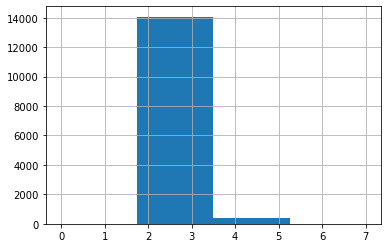

In [11]:
df['ceiling_height'].hist(bins=4, range=(0,7))

Практически все высотные значения потолков (из тех, которыми мы располагаем) находятся в реалистичном диапазоне. Значит аномалий не много. Рассмотрим выбросы подробнее.

In [12]:
display(df.loc[df['ceiling_height'] < 2])
display(df.loc[df['ceiling_height'] > 5])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5712,5,1500,42.8,2017-08-14,2,1.20,2,27.5,1,NaN,...,5.20,NaN,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
16934,5,4100,40.0,2017-10-17,1,1.75,37,17.4,5,NaN,...,8.34,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
22590,16,6000,55.0,2018-10-31,2,1.00,12,32.4,7,NaN,...,10.00,NaN,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600,55.2,2018-07-12,2,25.0,5,32.0,2,False,...,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
464,15,66571,280.3,2015-06-11,6,5.2,8,159.5,7,NaN,...,21.1,0.0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0
1026,20,155000,310.0,2018-10-12,5,5.3,3,190.0,3,NaN,...,63.0,2.0,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN
1388,20,59800,399.0,2015-01-21,5,5.6,6,NaN,6,NaN,...,NaN,0.0,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719.0
3148,14,2900,75.0,2018-11-12,3,32.0,3,53.0,2,NaN,...,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3474,3,1400,30.0,2018-03-16,1,8.0,5,15.3,2,False,...,7.3,NaN,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
4643,0,4300,45.0,2018-02-01,2,25.0,9,30.0,2,NaN,...,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000,25.0,2017-09-27,0,27.0,25,17.0,17,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,0,3850,30.5,2018-10-03,1,24.0,5,19.5,1,True,...,5.5,NaN,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500,54.0,2017-10-13,2,27.0,5,30.0,3,NaN,...,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0


In [13]:
df.query('ceiling_height == 1.2')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5712,5,1500,42.8,2017-08-14,2,1.2,2,27.5,1,NaN,...,5.2,NaN,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0


- Вероятно перепутаны единицы измерения в столбцах с высотой потолков более 20 м. На это указывают частые значения в райне 27м, которое сопоставимо со стандартом в 2,7м. Можно разделить такие значения на 10.
- Там где высота потолков менее 2м можно добавить единицу для исправления ошибки. На основании жизненного опыта скажу, что кроме подвалов мне никогда не встречались такие низкие помещения. В строчках указана жилая площадь, а по строительным нормам недопускается в эксплуатацию жилье с потолками менее 2.5. Более низкие потолки объясняются подвесными конструкциями потолка.
- Потолок с высотой 100 м и с жилой площадью 14 м на последнем этаже 5-этажки выглядит как выброс. Можно привести к стандартному значению 2,7.

In [14]:
df.loc[5712, 'ceiling_height'] = df.loc[5712, 'ceiling_height']+1  
df.loc[16934, 'ceiling_height'] = df.loc[16934, 'ceiling_height']+1
df.loc[22590, 'ceiling_height'] = df.loc[22590, 'ceiling_height']+1
display(df.loc[df['ceiling_height'] < 2])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


#### Заполнение пропусков

In [15]:
# методом .fillna() заполним пропуски нулями в столбце balcony и методом astype() преобразуем в int
df['balcony'] = df['balcony'].fillna(0).astype('int')
df['balcony'].value_counts()

0    15277
1     4195
2     3659
5      304
4      183
3       81
Name: balcony, dtype: int64

In [16]:
# NaN преобразуем в False, True оставляем
df['is_apartment'] = df['is_apartment'].fillna(False)
df['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

Данные в столбце is_apartment успешно заполнены.

Рассмотрим площадь кухни в квадратных метрах (м²) в столбце `kitchen_area`. 

In [17]:
display(df.loc[df['kitchen_area'].isna()].head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
30,12,2200,32.8,2018-02-19,1,NaN,9,NaN,2,False,...,NaN,0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990,45.8,2017-10-28,2,2.5,5,NaN,1,False,...,NaN,0,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350,40.0,2018-11-18,1,NaN,22,NaN,3,False,...,NaN,1,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
59,15,6300,46.5,2017-03-06,1,NaN,13,NaN,13,False,...,NaN,0,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0


Можно было попытаться восстановить столбец kitchen_area площадь кухни, отталкиваясь от жилой площади living_area, но данные в столбце также пропущены. Оставляем значения без изменений.

Рассмотрим название населённого пункта в столбце `locality_name`. 

locality_name | NaN = 49   | 0.2%

In [18]:
display(df.loc[df['locality_name'].isna()].head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600,81.7,2016-04-15,3,3.55,5,50.8,2,False,...,8.8,0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398,80.0,2017-05-30,3,NaN,4,42.6,2,False,...,18.6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351,42.7,2015-09-20,1,NaN,24,15.6,3,False,...,10.7,0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130,62.4,2015-10-11,2,NaN,24,33.1,21,False,...,8.2,0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200,46.5,2016-05-28,2,NaN,5,30.8,5,False,...,6.5,0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0


Удивительно, что мы не знаем наименование населенного пункта, когда почти в каждой графе у нас имеется расстояние до центра города, которые соответствуют действительности по Санкт - Петербургу. Санкт-Петербург самый северный из городов-миллионеров, он расположен между 60° 5’ (Промзона Парнас) и 59° 48’ сев. шир. Протяжённость города с восток на запад — 25 км, с севера на юг — 52 км, с северо-запада на юго-восток — около 90 км. Исправим недоразумение, внесем Санкт-Петербург в пропуски по столбцу locality_name. В строках, где отсутствуют значения city_centers_nearest судя по цене видим принадлежность к городу, возможно окраине города.

In [19]:
df['locality_name'].fillna('Санкт-Петербург', inplace=True)
display(df['locality_name'].isna().sum())

0

#### Прочие правки

Исправим ошибку в наименовании колонки cityCenters_nearest.

In [20]:
df.rename(columns={'cityCenters_nearest': 'city_centers_nearest'}, inplace=True)

Посмотрим на преобразования таблицы после этапа предобработки данных. Возможно мы могли что либо упустить.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int32         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23699 non-null  int32         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

#### Преобразование дистанций в км

Данные в таблице у нас предоставлены в метрах, тип значений подходящий - дробный, для удобства визуального восприятия переведем расстояния из метров(м) в километры(км).

In [22]:
# переводим дистанции в км
df['airports_nearest'] = df['airports_nearest'] / 1000
df['city_centers_nearest'] = df['city_centers_nearest'] / 1000
df['parks_nearest'] = df['parks_nearest'] / 1000
df['ponds_nearest'] = df['ponds_nearest'] / 1000
# проверяем корректность исправленных значений
df[['airports_nearest', 'city_centers_nearest', 'parks_nearest', 'ponds_nearest']].head()

,airports_nearest,city_centers_nearest,parks_nearest,ponds_nearest
0,18.863,16.028,0.482,0.755
1,12.817,18.603,NaN,NaN
2,21.741,13.933,0.090,0.574
3,28.098,6.800,0.084,0.234
4,31.856,8.098,0.112,0.048


#### Предварительное исследование аномалий 


Рассмотрим подробнее данные в столбцах для выявления пропущенных и недостоверных данных.

- Начнём с количества комнат (столбец rooms). Ранее мы наблюдали минимальное значение комнат 0, посчитаем их количество.

In [23]:
df['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

197 объектов недвижимости со значением 0. Возможно это студии, коммунальные квартиры или незаполненные данные. 
- Рассмотрим распределение площади 'total_area' таких объектов при помощи гистограммы hist(). 
- При помощи логической индексации выделим строки с 'rooms' == 0, 
- Разделим гистограмму на 50 участков, передадим параметру bins.
- Рассмотрим диапазон значений площади 'total_area' до 100 м²

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

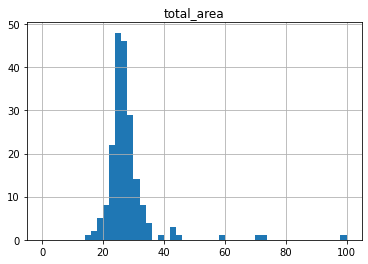

In [24]:
df.loc[df['rooms'] == 0].hist('total_area', bins=50, range=(0, 100))

Недвижимость с площадью менее 40 м² скорее всего имеет одну комнату. Можно заменять значение rooms в таких объявлениях на 1, но тогда мы потеряем потенциальную категорию квартир студий или комнат в коммунальных квартирах. Оставим данные без изменений.

Исследуем столбец studio. Странно, что он не выводится в таблице методом display. 

In [25]:
df['studio'].value_counts()

False    23550
True       149
Name: studio, dtype: int64

In [26]:
df['open_plan'].value_counts()

False    23632
True        67
Name: open_plan, dtype: int64

Ранее мы наблюдали 197 комнат со значением ноль, что даже звучит сюрреалистично. Можно предположить, что часть этих комнат являются студиями. Посмотрим подробнее срез данных.

In [27]:
display( df.loc[df['studio'] == True])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450,27.00,2017-03-30,0,NaN,24,15.50,2,False,...,NaN,2,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
440,8,2480,27.11,2018-03-12,0,NaN,17,24.75,4,False,...,NaN,2,Санкт-Петербург,38.171,15.015,0.0,NaN,2.0,0.982,64.0
608,2,1850,25.00,2019-02-20,0,NaN,10,NaN,7,False,...,NaN,0,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
697,12,2500,24.10,2017-12-01,0,2.75,25,17.50,21,False,...,NaN,0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.0
716,5,1500,17.00,2017-06-07,0,2.70,9,12.00,1,False,...,NaN,0,посёлок Шушары,18.654,29.846,0.0,NaN,0.0,NaN,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22867,8,3090,30.00,2017-12-17,0,NaN,25,18.20,5,False,...,NaN,0,Санкт-Петербург,35.250,16.414,0.0,NaN,1.0,0.400,211.0
22877,2,4280,28.00,2017-10-26,0,2.70,19,18.00,10,False,...,NaN,0,Санкт-Петербург,18.982,7.206,0.0,NaN,1.0,0.415,151.0
23210,7,3200,26.00,2017-09-01,0,NaN,25,18.00,16,False,...,NaN,0,Санкт-Петербург,11.405,13.222,0.0,NaN,1.0,0.623,14.0
23554,15,3350,26.00,2018-09-07,0,NaN,19,NaN,8,False,...,NaN,0,Санкт-Петербург,18.090,17.092,0.0,NaN,2.0,0.112,31.0


Удивительное рядом, мы опять не наблюдаем скрытый столбец studio, зато во всех выведенных на экран строках studio 0 комнат! Значит наше предположение о взаимосвязи подтверждается. Остается выяснить где зашифрованы оставшиеся 48 комнат со значением 0 (всего 197, 149 из них студии).

In [28]:
display( df.loc[df['open_plan'] == True])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
349,4,2320,25.0,2017-09-27,0,NaN,14,17.0,1,False,...,NaN,0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
508,0,3375,34.4,2017-03-28,0,NaN,26,24.3,19,False,...,NaN,1,посёлок Парголово,53.115,19.292,0.0,NaN,1.0,0.593,430.0
780,9,2600,26.1,2018-02-20,0,NaN,18,NaN,8,False,...,NaN,1,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
839,14,1900,35.0,2017-04-14,0,2.7,5,15.0,3,False,...,NaN,1,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7.0
946,5,2200,23.0,2016-09-27,0,NaN,27,18.0,7,False,...,NaN,2,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,483.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21299,13,2450,28.5,2017-11-22,0,NaN,12,18.0,7,False,...,NaN,2,Санкт-Петербург,20.381,19.383,0.0,NaN,1.0,0.579,73.0
21628,9,3900,34.0,2017-03-18,0,NaN,20,24.0,10,False,...,NaN,2,Санкт-Петербург,15.506,13.615,0.0,NaN,1.0,0.767,320.0
22573,8,2250,24.0,2017-09-28,0,NaN,12,15.0,3,False,...,NaN,2,городской посёлок Новоселье,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23442,0,2500,27.7,2017-09-28,0,NaN,24,18.0,4,False,...,NaN,2,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0


Опять не наблюдаем скрытый столбец open_plan, зато комнаты со значением 0 на прежнем месте.

In [29]:
# проверка на совпадения студий и открытой планировки
display(df.loc[((df['open_plan'] == True)) & ((df['studio'] == True)) ])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Открытые планировки и студии не пересекаются, и это значит, что оставшиеся 48 от 197 комнат со значением 0 мы можем причислять к открытым планировкам. То есть все 0 комнаты это или открытая планировка или студии. Математика все еще полностью не складывается. Пойдем чуть дальше - сложим количество строк удовлетворяющих нашим условиям, что 1) нулевые комнаты и студии равны и 2) нулевые комнаты и открытая планировка также равны, 3) эти условия не пересекаются. Стоит немного пояснить, ради чего ведется это исследование по комнатам - мы выясняем, необходимо ли заменять или выбрасывать комнаты со значением 0. Ведь это имеет прямое отношение к стоимости недвижимости, в чем кроется суть нашего исследования. Продолжим.

In [30]:
# перепроверка на совпадения студий и комнат
display(len(df.loc[((df['rooms'] == 0)) & ((df['studio'] == True)) ]))

138

In [31]:
# перепроверка на совпадения открытых планировок и комнат
display(len(df.loc[((df['rooms'] == 0)) & ((df['open_plan'] == True)) ]))

59

In [32]:
# перепроверка на совпадения комнат, студий и открытых планировок
display(
    len(df.loc[((df['rooms'] == 0)) & ((df['studio'] == True))])
    +
    len(df.loc[((df['rooms'] == 0)) & ((df['open_plan'] == True)) ])
)

197

Убедились в принятом решении не заменять и не исключать 0 комнаты, выявили принадлежность этих нулевых комнат к студиям и открытым планировкам.

Повторно оценим количество NaN в разных колонках   

In [33]:
print('Распределение пропусков в таблице:')
ratio_nan(df)

Распределение пропусков в таблице:
living_area         | NaN = 1903 | 8.0% 
kitchen_area        | NaN = 2278 | 9.6% 
days_exposition     | NaN = 3181 | 13.4%
parks_around3000    | NaN = 5518 | 23.3%
ponds_around3000    | NaN = 5518 | 23.3%
city_centers_nearest| NaN = 5519 | 23.3%
airports_nearest    | NaN = 5542 | 23.4%
ceiling_height      | NaN = 9195 | 38.8%
ponds_nearest       | NaN = 14589| 61.6%
parks_nearest       | NaN = 15620| 65.9%


Осталось исправить достаточное количество пропусков, для объективности дальнейшего исследования. Но влияют ли оставшиеся параметры на цену? Ранее мы лишь предполагали, а теперь попробуем оценить. Применим к таблице метод corr.

In [34]:
df.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.104451,0.115352,0.099288,-0.002036,0.011120,0.104780,0.031340,0.010532,-0.029303,-0.024407,0.104756,0.048903,-0.002298,-0.047666,0.021120,-0.008347,-0.011553,-0.003034,-0.026657
last_price,0.104451,1.000000,0.653740,0.363341,0.085392,-0.006902,0.566487,0.026757,0.026955,-0.025366,-0.008805,0.520162,0.008531,-0.026206,-0.206780,0.151086,-0.016326,0.159952,-0.084809,0.081103
total_area,0.115352,0.653740,1.000000,0.758344,0.095432,-0.075674,0.939537,-0.024754,0.029633,-0.072653,-0.034885,0.609121,0.009941,-0.030753,-0.231446,0.164689,-0.021497,0.162346,-0.097969,0.149675
rooms,0.099288,0.363341,0.758344,1.000000,0.054394,-0.227649,0.845977,-0.150862,0.000399,-0.147286,-0.087500,0.269945,-0.015519,-0.061199,-0.184864,0.137257,-0.054549,0.092693,-0.057689,0.126961
ceiling_height,-0.002036,0.085392,0.095432,0.054394,1.000000,-0.028555,0.090588,-0.011846,0.154969,0.001662,0.042777,0.087572,0.031110,-0.023982,-0.091646,0.065983,-0.019238,0.078471,-0.059368,0.019025
floors_total,0.011120,-0.006902,-0.075674,-0.227649,-0.028555,1.000000,-0.169090,0.674346,-0.026306,0.069103,0.050834,0.163521,0.173183,0.107848,0.019502,-0.252265,0.096972,-0.122593,0.038994,-0.052123
living_area,0.104780,0.566487,0.939537,0.845977,0.090588,-0.169090,1.000000,-0.097210,0.026969,-0.056231,-0.033711,0.428674,-0.014772,-0.057912,-0.231368,0.184453,-0.050167,0.148933,-0.081674,0.142454
floor,0.031340,0.026757,-0.024754,-0.150862,-0.011846,0.674346,-0.097210,1.000000,-0.013294,0.036940,0.035824,0.135531,0.168567,0.071597,0.009084,-0.163784,0.073045,-0.076312,0.024850,-0.039463
is_apartment,0.010532,0.026955,0.029633,0.000399,0.154969,-0.026306,0.026969,-0.013294,1.000000,-0.003657,-0.002448,0.049034,0.033022,0.016470,0.003732,0.020767,-0.033410,0.023989,0.003357,0.015262
studio,-0.029303,-0.025366,-0.072653,-0.147286,0.001662,0.069103,-0.056231,0.036940,-0.003657,1.000000,-0.004235,NaN,0.028899,-0.021876,-0.007029,-0.030202,0.009134,0.000939,0.002606,-0.022476


Из списка необработанных пропущенных значений видим, что жилая площадь living_area сильно влияет на цену. В общем то это не удивительный вывод, так как мы исследуем жилую недвижимость. Следовательно стоит заполнить данные пропуски. От чего может зависеть жилая площадь в первую очередь? Естественно, что от общей площади, что и наблюдаем в таблице корреляции. Не подвергается сомнению тот факт, что жилая площадь в квартирах всегда будет меньше общей площади, поскольку в квартирах и студиях часть пространства отводится на санузлы, кухни. Можно при помощи категоризации данных вычислить среднюю жилую площадь  квартиры в зависимости от общей площади и заполнить недостающие данные в столбце living_area. Технически необходимо будет прописать функцию с параметрами категоризации, а затем передать результат ее работы методу fillna, который заполнит пропуски нужными нам средними значениями. Однако также мы видим, что цена напрямую зависит от общей площади и скорее косвенно от жилой площади, поэтому возможно не стоит заполнять недостающие данные без особой необходимости.

## Вывод
На этапе предобработки:
- была произведена проверка на дубликаты в строках. Дубликатов не обнаружено
- была исправлена стилистическая ошибка в наименовании колонки city_centers_nearest
- были исправлены некорректные или неподходящие типы данных в соответствии со смыслом информации в столбцах:
            last_price, first_day_exposition, floors_total, is_apartment, balcony.
- Заполнены пропуски в столбцах:
            locality_name, floors_total, balcony.
- Дополнительно были исследованы подозрительные значения rooms со значением 0. Выяснили, что под этими значениями скрываются студии и открытые планировки. 
- По остальным данным было принято решение оставить данные максимально без искажений. Возможно при исследовании мы выявим закономерности и взаимосвязи между столбцами и после сможем скорректировать решение.

## Часть 3. Добавление дополнительных данных в таблицу

### Цена квадратного метра недвижимости

Посчитаем и добавим в таблицу цену квадратного метра жилья. Для визуального удобства цены были переведены в тысячи рублей в столбце last_price. 

In [35]:

try:
    df['price_m2'] = (df['last_price'] / df['total_area']).round(1)
except:
    print('Ошибка! На 0 делить нельзя!')
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2
0,20,13000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,0,Санкт-Петербург,18.863,16.028,1.0,0.482,2.0,0.755,NaN,120.4
1,7,3350,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,2,посёлок Шушары,12.817,18.603,0.0,NaN,0.0,NaN,81.0,82.9
2,10,5196,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,0,Санкт-Петербург,21.741,13.933,1.0,0.090,2.0,0.574,558.0,92.8
3,0,64900,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,0,Санкт-Петербург,28.098,6.800,2.0,0.084,3.0,0.234,424.0,408.2
4,2,10000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,0,Санкт-Петербург,31.856,8.098,2.0,0.112,1.0,0.048,121.0,100.0


Посмотрим на среднее  и медиану по цене за м2.

In [36]:
df['price_m2'].describe()

count    23699.000000
mean        99.426233
std         50.302514
min          8.000000
25%         76.600000
50%         95.000000
75%        114.300000
max       1907.500000
Name: price_m2, dtype: float64

Средняя цена и медиана напоминают устаревшие данные до 2017 года, если судить по статистике spbhomes.ru. Далее самостоятельно исследуем цену в зависимости от года.

### День недели, месяц и год публикации объявления;

Для добавления в таблицу новых данных воспольземся информацией из столбца first_day_exposition и методами year, month, weekday присвоим соответствующие значения дней недели, месяцев и лет новым колонкам.

In [37]:
df['weekday_publish'] = df['first_day_exposition'].dt.weekday
df['month_publish'] = df['first_day_exposition'].dt.month
df['year_publish'] = df['first_day_exposition'].dt.year
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,weekday_publish,month_publish,year_publish
0,20,13000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,16.028,1.0,0.482,2.0,0.755,NaN,120.4,3,3,2019
1,7,3350,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,18.603,0.0,NaN,0.0,NaN,81.0,82.9,1,12,2018
2,10,5196,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,13.933,1.0,0.090,2.0,0.574,558.0,92.8,3,8,2015
3,0,64900,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,6.800,2.0,0.084,3.0,0.234,424.0,408.2,4,7,2015
4,2,10000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,8.098,2.0,0.112,1.0,0.048,121.0,100.0,1,6,2018


Визуально неудобно воспринимать дни недели и месяцы в соответствии с их порядковым номером. Зато такие данные в общей таблице проще обрабатывать.
Создадим функции, которые исправят эти недочеты и добавим значения в словарь. К данным можно обращаться по словарю.

In [38]:
# создаем словарь из данных df, удаляем дубликаты в словаре
dict_weekday = df[['weekday_publish']].drop_duplicates().reset_index(drop=True)
dict_weekday.value_counts()

weekday_publish
0                  1
1                  1
2                  1
3                  1
4                  1
5                  1
6                  1
dtype: int64

In [39]:
print(dict_weekday.columns)

Index(['weekday_publish'], dtype='object')


Создаем функцию weekday и проверим ее работу.

In [40]:
def weekday(day):
    if day == 0:
        return 'Понедельник'
    elif day == 1:
        return 'Вторник'
    elif day == 2:
        return 'Среда'
    elif day == 3:
        return 'Четверг'
    elif day == 4:
        return 'Пятница'
    elif day == 5:
        return 'Суббота'
    else:
        return 'Воскресенье'
print(weekday(0))

Понедельник


In [41]:
dict_weekday['weekday'] = dict_weekday['weekday_publish'].apply(weekday)
display(dict_weekday.sort_values(by='weekday_publish'))

,weekday_publish,weekday
3,0,Понедельник
1,1,Вторник
4,2,Среда
0,3,Четверг
2,4,Пятница
6,5,Суббота
5,6,Воскресенье


Теперь к дням недели можно обращаться по словарю weekday_dict.

In [42]:
df['month_publish'].value_counts()

2     2640
3     2587
4     2379
11    2371
10    2127
9     1981
6     1760
8     1744
7     1695
12    1641
1     1500
5     1274
Name: month_publish, dtype: int64

Видим, что месяцам соответствует порядковый номер в году, создадим дополнительный словарь вручную.

In [43]:
dict_month = {1:'Январь', 2:'Февраль', 3:'Март', 4:'Апрель', 5:'Май', 6:'Июнь', 
 7:'Июль', 8:'Август', 9:'Сентябрь', 10:'Октябрь', 11:'Ноябрь', 12:'Декабрь'}
display(dict_month)

{1: 'Январь',
 2: 'Февраль',
 3: 'Март',
 4: 'Апрель',
 5: 'Май',
 6: 'Июнь',
 7: 'Июль',
 8: 'Август',
 9: 'Сентябрь',
 10: 'Октябрь',
 11: 'Ноябрь',
 12: 'Декабрь'}

### Этаж квартиры; варианты — первый, последний, другой;

Для добавления в таблицу категорий квартир в зависимости от этажа воспольземся информацией из столбцов floor и floors_total. Создадим функцию floor_category(row) для нахождения категории этажа квартиры и передадим ее результат новому столбцу category_floor с помощью метода apply.

In [44]:
def category_floor(floor):
    if floor['floor'] == 1:
        return 'первый'
    elif floor['floor'] == floor['floors_total']:
        return 'последний'
    else:
        return 'другой'
df['category_floor'] = df.apply(category_floor, axis=1)
display(df[['floor', 'floors_total', 'category_floor']].head())

,floor,floors_total,category_floor
0,8,16,другой
1,1,11,первый
2,4,5,другой
3,9,14,другой
4,13,14,другой


### Соотношение жилой и общей площади, а также отношение площади кухни к общей.

Определим соотношения жилой и кухонной площади к общей. Сохраним результат в дополнительных столбцах living_to_total и kitchen_to_total.

In [45]:
df['living_to_total'] = (df['living_area'] / df['total_area']).round(2)
df['kitchen_to_total'] = (df['kitchen_area'] / df['total_area']).round(2)
df[['total_area', 'living_area', 'kitchen_area', 'living_to_total', 'kitchen_to_total']].head()

,total_area,living_area,kitchen_area,living_to_total,kitchen_to_total
0,108.0,51.0,25.0,0.47,0.23
1,40.4,18.6,11.0,0.46,0.27
2,56.0,34.3,8.3,0.61,0.15
3,159.0,NaN,NaN,NaN,NaN
4,100.0,32.0,41.0,0.32,0.41


## Добавление дополнительных данных в таблицу. Выводы 

In [46]:
df[['weekday_publish', 'month_publish', 'year_publish', 
    'floor', 'floors_total', 'category_floor', 
    'total_area', 'living_area', 'kitchen_area', 'living_to_total', 'kitchen_to_total']].head()

,weekday_publish,month_publish,year_publish,floor,floors_total,category_floor,total_area,living_area,kitchen_area,living_to_total,kitchen_to_total
0,3,3,2019,8,16,другой,108.0,51.0,25.0,0.47,0.23
1,1,12,2018,1,11,первый,40.4,18.6,11.0,0.46,0.27
2,3,8,2015,4,5,другой,56.0,34.3,8.3,0.61,0.15
3,4,7,2015,9,14,другой,159.0,NaN,NaN,NaN,NaN
4,1,6,2018,13,14,другой,100.0,32.0,41.0,0.32,0.41


В таблицу добавлены дополнительные данные в соответствии с заданием:

        - цена квадратного метра - хранится в столбце price_m2;
        - день недели, месяц и год публикации объявления - сохранены в weekday_publish, month_publish, year_publish. К данным недели и месяца можно обращаться по словарям dict_weekday, dict_month соответственно;
        - этаж квартиры с вариантами "первый, последний, другой" хранятся в новом столбце category_floor;
        - соотношение жилой и общей площади, а также отношение площади кухни к общей добавлены в столбцы living_to_total и kitchen_to_total.
        
 В добавленных столбцах присутствуют пропущенные значения в соответствии с пропусками в изначальных данных. При необходимости возможно восстановить эти значения, исходя из взаимосвязанных колонок, но стоит понимать, что данные в таком случае могут быть искажены.

## 4. Исследовательский анализ данных

### 4.1 Изучение параметров: площадь, цена, число комнат, высота потолков

In [47]:
df[['total_area', 'last_price', 'price_m2', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,price_m2,rooms,ceiling_height
count,23699.000000,23699.000000,23699.000000,23699.000000,14504.000000
mean,60.348651,6542.038567,99.426233,2.070636,2.771706
std,35.654083,10886.983483,50.302514,1.078405,1.260899
min,12.000000,430.000000,8.000000,0.000000,2.000000
25%,40.000000,3400.000000,76.600000,1.000000,2.520000
50%,52.000000,4650.000000,95.000000,2.000000,2.650000
75%,69.900000,6800.000000,114.300000,3.000000,2.800000
max,900.000000,763000.000000,1907.500000,19.000000,100.000000


Напишем функцию для определения высоты потолков в зависимости от расстояния от центра (радиуса). 

Согласно данным по яндекс картам условно определим диаметр центра Санкт_Петербурга в значении 12 км. Значит радиус будет 6 км. 

In [48]:
def center_radius(radius):
    if radius <= 6:
        return 'центр'
    else:
        return 'не центр'
#проверим работу функции
print(center_radius(6))
print(center_radius(7))

центр
не центр


- Площади выглядят правдоподобно, если судить по медиане и среднему. Допустимо максимальное значение в 900м2 для элитного жилья. 
- Цены в среднем варьируются в диапазоне от 3 до 7 миллионов рублей, средняя цена завышена относительно медианы, по всей видимости свои коррективы вносит элитное жилье, с максимальной стоимостью в 763 млн. Когда в помещение входит Билл Гейтс в среднем все присутствующие рядом становятся миллионерами. Минимальное значение 430 т.р. допустимо в пригородах Санкт - Петербурга.
- Комнаты в большинстве распределены между значениями 1 и 3. Нулевые значения, как мы выяснили ранее - это студии и открытые планировки.
- Высота потолков в среднем 2,77м, а медиана 2,65м. На этапе предобработки мы не заполнили пропуски, но предположили, что высота потолков зависит от удаленности от центра города. Также были выявлены некорректные значения потолков в 1м, которые мы заменили вручную. Присутствуют ошибочные завышенные в 10 раз значения, которые тянут среднее арифметическое вверх. Максимальное значение в 100 м также является выбросом.

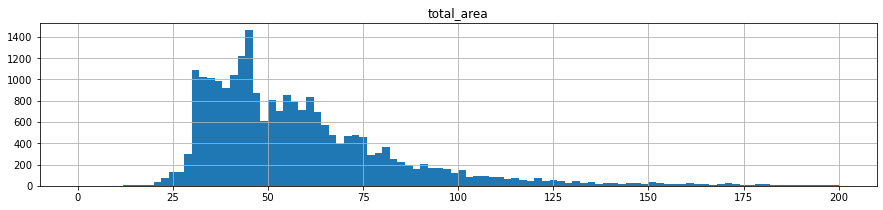

In [49]:
df.hist('total_area', bins=100, figsize=(15,3), range = (0, 200))
plt.show()

<AxesSubplot:>

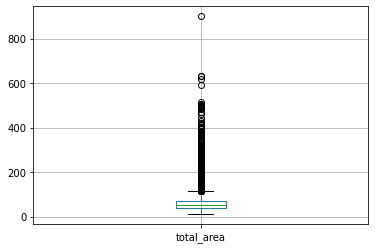

In [50]:
df.boxplot('total_area')

- В графике для площади недвижимости видим два явно преобладающих пика. Можем интерпритировать их как площадь в 40 и 50 м2 для однокомнатных и двухкомнатных квартир соответственно. 
- Визуально значения ниже 20 м2 почти не встречаются.
- По мере увеличения площади уменьшается количество объектов недвижимости. Это объяснимо все возрастающей стоимостью, с которой площадь находится в прямой зависимости.
- Средняя площадь в 60м2 завышена относительно медианы в 50м2, поскольку медиана стремится в сторону увеличения площади.

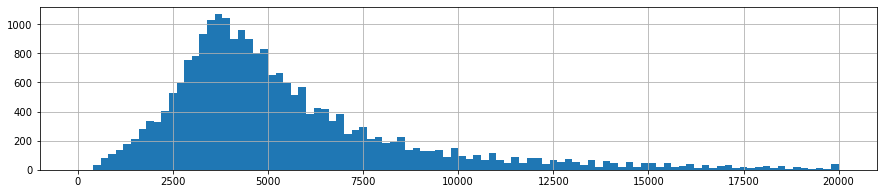

In [51]:
df['last_price'].hist(bins=100, figsize=(15,3), range=(0, 20000))
plt.show()

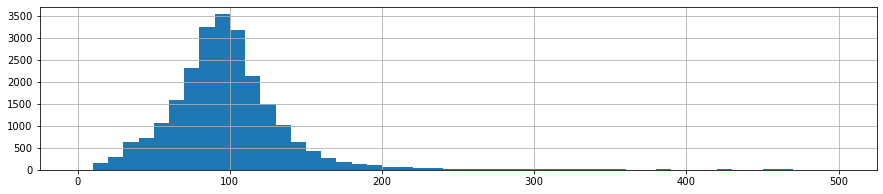

In [52]:
df['price_m2'].hist(bins=50, figsize=(15,3), range=(0, 500))
plt.show()

<AxesSubplot:>

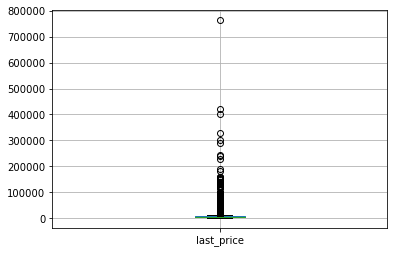

In [53]:
df.boxplot('last_price')

<AxesSubplot:>

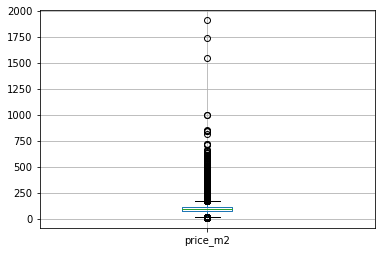

In [54]:
df.boxplot('price_m2')

Если вас спросят, сколько стоит квартира в Питере и вы ответите, что 4 миллиона, тогда ваш ответ будет соответствовать преобладающим значениям гистограммы, которую мы вывели на экран!

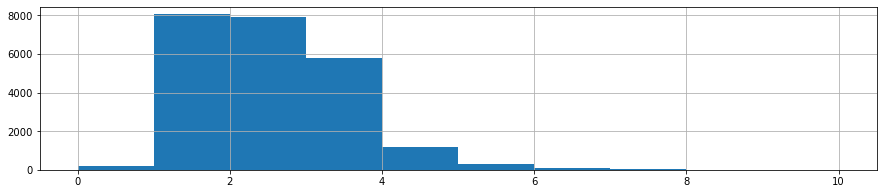

In [55]:
df['rooms'].hist(bins=10, figsize=(15,3), range=(0,10))
plt.show()

<AxesSubplot:>

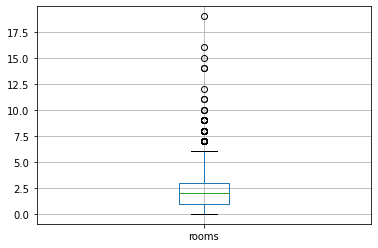

In [56]:
df.boxplot('rooms')

Видим наглядное подтверждение предыдущим выводам о преобладании квартир с одной - тремя комнатами, впрочем как и везде в России. Этот вывод не удивителен.

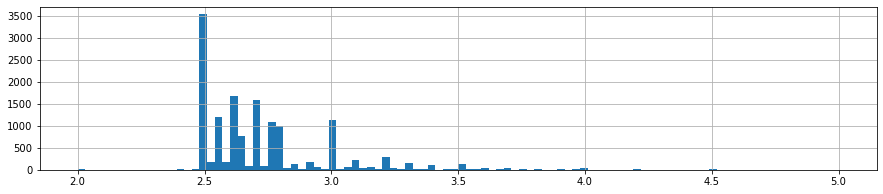

In [57]:
df['ceiling_height'].hist(bins=100, figsize=(15,3), range=(2, 5))
plt.show()

<AxesSubplot:>

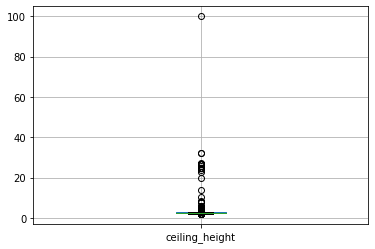

In [58]:
df.boxplot('ceiling_height')

Несмотря на отсутствие 38% данных в столбце ceiling_height, мы все равно можем сделать вывод, что в Санкт-Петербурге преобладает недвижимость со стандартными потолками в 2,7м. Вызывает сомнение пик на значении 2,5 с количеством квартир 3500, что значит что многие квартиры построены по минимально допустимым строительным нормам по высоте потолков. Вероятнее всего каждому типу потолков соответствует определенная серия типовых домов. Как мы ранее предполагали, а теперь наглядно видим, что пик в значении 3м похож на потолки в домах, распологающихся в историческом центре города. Таких квартир на рынке около тысячи. В целом разброс значений сконцентрирован от 2,5 до 3,5м.

Сохраним в новой таблице наиболее типовые значения, исключающие аномальные значения, для более корректных выводов.

In [59]:
analytics_df = df.query('(12 <= total_area <= 200) & (8 <= price_m2 <= 750) & (0 <= rooms <= 10) & (2.4 <= ceiling_height <= 4.1)')

In [60]:
analytics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14271 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          14271 non-null  int64         
 1   last_price            14271 non-null  int32         
 2   total_area            14271 non-null  float64       
 3   first_day_exposition  14271 non-null  datetime64[ns]
 4   rooms                 14271 non-null  int64         
 5   ceiling_height        14271 non-null  float64       
 6   floors_total          14271 non-null  int32         
 7   living_area           13501 non-null  float64       
 8   floor                 14271 non-null  int64         
 9   is_apartment          14271 non-null  bool          
 10  studio                14271 non-null  bool          
 11  open_plan             14271 non-null  bool          
 12  kitchen_area          13365 non-null  float64       
 13  balcony         

Благодаря выставленным параметрам таблица на 40% уменьшилась в размерах. Похоже на то, что многие значения не прошли по параметру ceiling_height, так как в столбце 38,8% пропусков NaN. Это серьезно может повлиять на последующие выводы. Лучше восстановить пропуски. Но пока двигаемся далее и делаем выводы по основной таблице, рассчитывая на то, что от высоты потолков не сильно зависит стоимость.

In [61]:
analytics_df = (analytics_df[['total_area', 'last_price', 'price_m2', 'rooms', 'ceiling_height',
                       'city_centers_nearest',
                       'days_exposition', 
                       'locality_name', 
                        'weekday_publish', 
                       'month_publish', 'year_publish', 
                       'category_floor']]
                )
analytics_df.describe()

,total_area,last_price,price_m2,rooms,ceiling_height,city_centers_nearest,days_exposition,weekday_publish,month_publish,year_publish
count,14271.000000,14271.000000,14271.000000,14271.000000,14271.000000,11360.000000,11876.000000,14271.000000,14271.000000,14271.000000
mean,59.517752,6241.907365,100.193771,2.097050,2.716187,14.191999,189.099023,2.502277,6.323523,2017.512508
std,27.259477,5452.419567,41.500323,1.006238,0.250063,8.743676,227.382479,1.791862,3.500659,1.025721
min,12.000000,450.000000,9.600000,0.000000,2.400000,0.181000,1.000000,0.000000,1.000000,2014.000000
25%,41.000000,3550.000000,78.400000,1.000000,2.510000,9.289000,45.000000,1.000000,3.000000,2017.000000
50%,53.000000,4800.000000,96.600000,2.000000,2.650000,13.032500,103.000000,2.000000,6.000000,2018.000000
75%,70.250000,6950.000000,116.100000,3.000000,2.800000,16.077000,245.000000,4.000000,10.000000,2018.000000
max,200.000000,95000.000000,721.500000,8.000000,4.100000,65.968000,1580.000000,6.000000,12.000000,2019.000000


### 4.2 Изучение времени продажи квартиры

In [62]:
display(df['days_exposition'].describe())

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

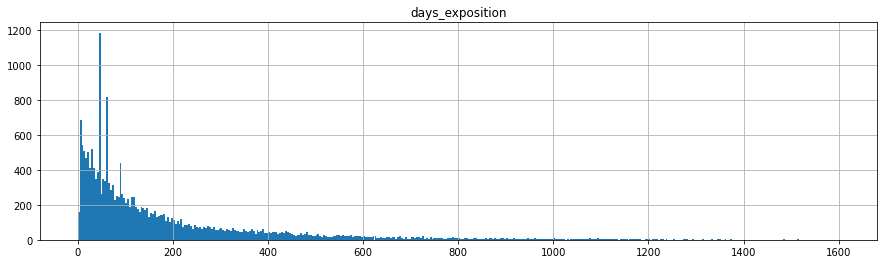

In [63]:
df.hist('days_exposition', bins=400, figsize=(15,4), range=(0, 1600))

<AxesSubplot:>

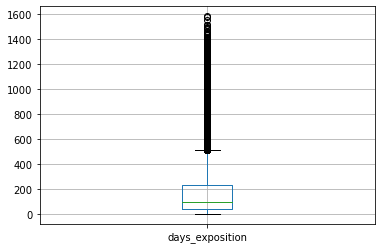

In [64]:
df.boxplot('days_exposition')

Сводная таблица по населенным пунктам.

In [65]:
time_df = df.pivot_table(index='locality_name', 
                             values='days_exposition', 
                             aggfunc=['count', 'mean', 'median', 'first', 'last'])
time_df.columns = ['count', 'mean', 'median', 'first', 'last']
display(time_df.sort_values(by='count', ascending=False).head(10))

,count,mean,median,first,last
locality_name,,,,,
Санкт-Петербург,13686,182.988090,95.0,558.0,602.0
посёлок Мурино,517,147.572534,72.0,189.0,939.0
посёлок Шушары,408,156.102941,92.0,81.0,124.0
Всеволожск,339,197.085546,123.0,226.0,28.0
Колпино,308,143.600649,74.0,92.0,74.0
Пушкин,307,209.579805,130.0,203.0,252.0
посёлок Парголово,302,155.503311,79.0,155.0,409.0
деревня Кудрово,299,180.872910,80.0,60.0,286.0
Гатчина,268,189.619403,99.5,179.0,204.0


### Вывод:
- Среднее время продажи почти в 2 раза превышает медиану. Значения на гистограме дают нам пояснения, что это возможно по причине длинного распределения в направлении возрастания сроков продажи квартир. Иными словами многие квартиры долго продаются и это возможно из за неадекватных рынку цен.
- Большинство квартир продаются в срок от 45 до 232 дней. Остальные объявления вносят искажения в общую картину.
- Интересно выделяются три пика на гистограме в сроке до 100 дней. Возможно в эти периоды были какие нибудь выгодные предложения от застройщиков или в сервисе автоматически установлены сроки снятия объявления с продаж. При необходимости можно выяснить, что происходило в этот период с недвижимостью.
- Остальные продажи протекали предсказуемо с течением времени и плавно шли на спад.
- Можно сделать вывод, что чем дольше срок продажи, тем меньше шансов продать недвижимость. Соответственно для продавца есть серьезный повод задуматься, если его объект не покупают более 230 дней. Тем не менее большое количество объявлений пересекает эту границу. В России твердо устоялось общественное мнение, что недвижимость никогда не теряет в цене. Такие объявления по всей видимости не преследуют цель реальной продажи, а висят "на всякий случай".
- Исходя из диаграммы размаха объявления за границей 500 дней это очень высокие значения, но вполне реальные.
- Самый долгий срок продажи недвижимости представлен значением в 4 года(1580 дней). Да, и такое бывает. Нельзя никогда терять надежду, может быть именно завтра и за вами придут.

### 4.3 Поиск редких и выбивающихся значений

In [66]:
df[['total_area', 'last_price', 'rooms', 'ceiling_height', 'city_centers_nearest', ]].describe()

,total_area,last_price,rooms,ceiling_height,city_centers_nearest
count,23699.000000,23699.000000,23699.000000,14504.000000,18180.000000
mean,60.348651,6542.038567,2.070636,2.771706,14.191278
std,35.654083,10886.983483,1.078405,1.260899,8.608386
min,12.000000,430.000000,0.000000,2.000000,0.181000
25%,40.000000,3400.000000,1.000000,2.520000,9.238000
50%,52.000000,4650.000000,2.000000,2.650000,13.098500
75%,69.900000,6800.000000,3.000000,2.800000,16.293000
max,900.000000,763000.000000,19.000000,100.000000,65.968000


Матрица диаграмм рассеяния

In [67]:
df.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,weekday_publish,month_publish,year_publish,living_to_total,kitchen_to_total
total_images,1.000000,0.104451,0.115352,0.099288,-0.002036,0.011120,0.104780,0.031340,0.010532,-0.029303,...,-0.008347,-0.011553,-0.003034,-0.026657,0.132745,-0.010433,0.005043,0.140411,0.000443,-0.025682
last_price,0.104451,1.000000,0.653740,0.363341,0.085392,-0.006902,0.566487,0.026757,0.026955,-0.025366,...,-0.016326,0.159952,-0.084809,0.081103,0.736514,0.001535,0.002734,-0.043016,0.002222,-0.089222
total_area,0.115352,0.653740,1.000000,0.758344,0.095432,-0.075674,0.939537,-0.024754,0.029633,-0.072653,...,-0.021497,0.162346,-0.097969,0.149675,0.302114,-0.004695,0.004920,-0.079912,0.142484,-0.317534
rooms,0.099288,0.363341,0.758344,1.000000,0.054394,-0.227649,0.845977,-0.150862,0.000399,-0.147286,...,-0.054549,0.092693,-0.057689,0.126961,0.055422,-0.004134,-0.004469,-0.055418,0.481218,-0.590203
ceiling_height,-0.002036,0.085392,0.095432,0.054394,1.000000,-0.028555,0.090588,-0.011846,0.154969,0.001662,...,-0.019238,0.078471,-0.059368,0.019025,0.122827,-0.009158,-0.001258,-0.013596,0.011341,0.016281
floors_total,0.011120,-0.006902,-0.075674,-0.227649,-0.028555,1.000000,-0.169090,0.674346,-0.026306,0.069103,...,0.096972,-0.122593,0.038994,-0.052123,0.148046,0.012942,0.016625,0.008060,-0.365061,0.349711
living_area,0.104780,0.566487,0.939537,0.845977,0.090588,-0.169090,1.000000,-0.097210,0.026969,-0.056231,...,-0.050167,0.148933,-0.081674,0.142454,0.226361,-0.005605,-0.002483,-0.072696,0.418666,-0.481560
floor,0.031340,0.026757,-0.024754,-0.150862,-0.011846,0.674346,-0.097210,1.000000,-0.013294,0.036940,...,0.073045,-0.076312,0.024850,-0.039463,0.129432,0.012347,0.019387,0.004915,-0.264551,0.244152
is_apartment,0.010532,0.026955,0.029633,0.000399,0.154969,-0.026306,0.026969,-0.013294,1.000000,-0.003657,...,-0.033410,0.023989,0.003357,0.015262,0.044731,-0.009492,0.002369,0.009413,0.002091,0.024261
studio,-0.029303,-0.025366,-0.072653,-0.147286,0.001662,0.069103,-0.056231,0.036940,-0.003657,1.000000,...,0.009134,0.000939,0.002606,-0.022476,0.015634,-0.000843,0.000976,0.011961,0.088893,NaN


### 4.4 Поиск факторов влияющих на стоимость квартиры

Найдем зависимость стоимости квартиры от остальных факторов. Сначала взглянем на исходную таблицу, затем на очищенную от выбросов.

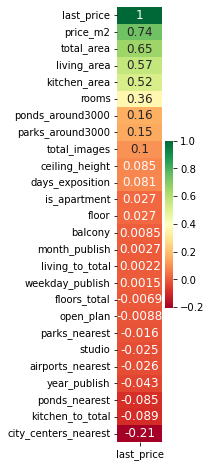

In [68]:
import seaborn as sns
plt.figure(figsize=(1,8))
sns.heatmap(df.corr()[['last_price']].sort_values(by='last_price', ascending=False), cmap='RdYlGn', 
            annot=True, annot_kws={'size':12})
plt.show()

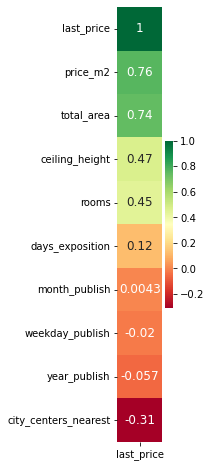

In [69]:
plt.figure(figsize=(1,8))
sns.heatmap(analytics_df.corr()[['last_price']].sort_values(by='last_price', ascending=False), cmap='RdYlGn', 
            annot=True, annot_kws={'size':12})
plt.show()

Создадим дополнительную таблицу analytics_df_corr из отфильтрованной таблицы analytics_df. В ней рассмотрим влияние на стоимость last_price:
   
    - площади квартиры total_area, 
    - количества комнат rooms, 
    - удалённости от центра city_centers_nearest,
Создадим дополнительную таблицу df_corr_date из отфильтрованной таблицы analytics_df. В ней дополнительно рассмотрим влияние на стоимость last_price:

    - этажа квартиры category_floor, 
    - даты размещения: дня недели, месяца и года (параметры weekday_publish, month_publish и year_publish соответственно).
    
Построим графики зависимостей данных параметров с помощью матрицы диаграмм рассеяния
    Определим коэффициент корреляции Пирсона для каждой пары параметров при помощи функции corr().

In [70]:
analytics_df_corr = analytics_df[['last_price', 'total_area', 'rooms', 'city_centers_nearest']]
analytics_df_corr.corr().round(2)

,last_price,total_area,rooms,city_centers_nearest
last_price,1.00,0.74,0.45,-0.31
total_area,0.74,1.00,0.79,-0.24
rooms,0.45,0.79,1.00,-0.17
city_centers_nearest,-0.31,-0.24,-0.17,1.00


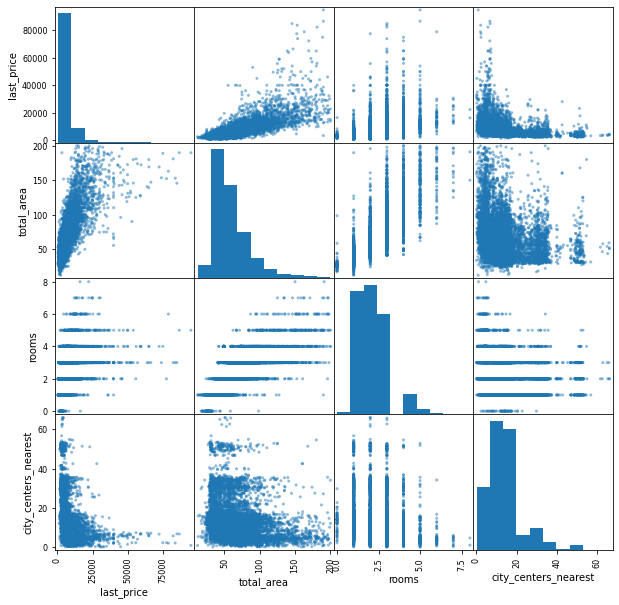

In [71]:
pd.plotting.scatter_matrix(analytics_df_corr, figsize=(10, 10))
plt.show()

- Зависимость между last_price и total_area выражена положительным коэффициентом корреляции со значением 0.74.
- Cтоимость квартиры возрастает с увеличением общей площади.
- Можно сказать, что между параметрами цены и площади существует прямая зависимость.
- Чуть менее сильная зависимость цены наблюдается в зависимости от количества комнат со значением 0.45. Это объяснимо тем, что на одной и той же площади может находится различное количество комнат. Это подтверждается зависимостью 0.79 между комнатами и площадью. В целом выстраивается уменьшающаяся цепочка зависимости коэффициента корреляции: цена зависит от площади, плоащади зависят от количества комнат.
- Стоимость квартир снижается по мере удаления от центра. Об этом свидетельствует отрицательный коэффициент Пирсона со значением -0.31.

In [72]:
df_corr_date = analytics_df[['last_price', 'category_floor', 'weekday_publish', 'month_publish', 'year_publish']]
df_corr_date.corr().round(2)

,last_price,weekday_publish,month_publish,year_publish
last_price,1.00,-0.02,0.00,-0.06
weekday_publish,-0.02,1.00,-0.01,-0.00
month_publish,0.00,-0.01,1.00,-0.30
year_publish,-0.06,-0.00,-0.30,1.00


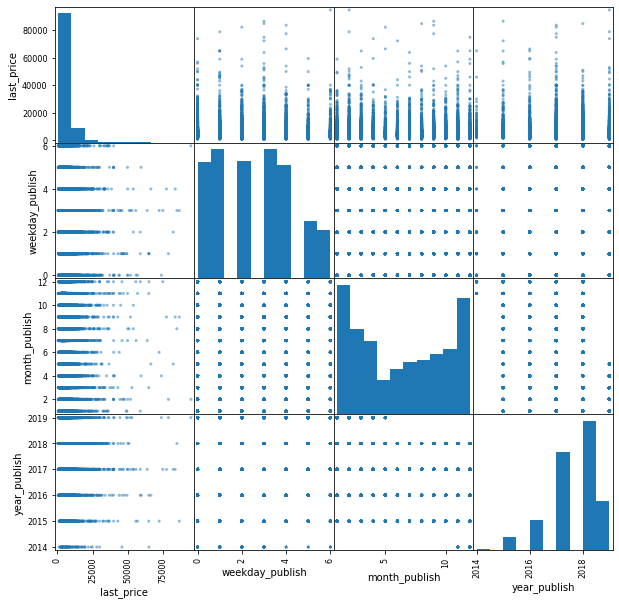

In [73]:
pd.plotting.scatter_matrix(df_corr_date, figsize=(10, 10))
plt.show()

По матрице диаграмм рассеяния и по таблице корреляции Пирсона мы наблюдаем отсутствие явной зависимости между ценой и неделей или месяцем размещения публикации. Но все же цифры свидетельствуют о  понижении стоимости квартир в шестилетний период с 2014 по 2019 годы. Хорошее было время, ведь в последущие годы мы уже привыкли к неуклонному росту цен на недвижимость в Санкт-Петербурге. Возможно все таки стоит изучить подробнее зависимости, прежде чем формулировать выводы.

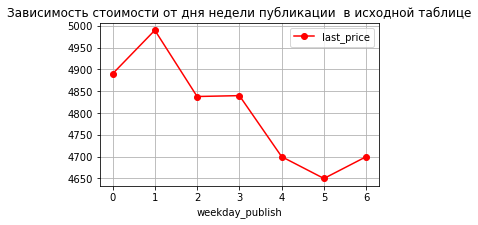

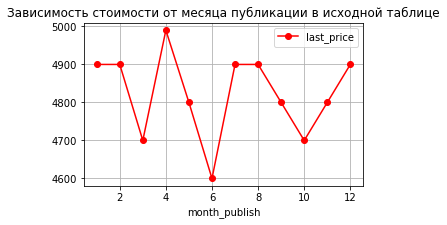

In [74]:
(analytics_df
 .pivot_table(index='weekday_publish', values='last_price', aggfunc='median')
 .plot(style='-or', figsize=(5, 3), title='Зависимость стоимости от дня недели публикации  в исходной таблице', grid=True)
)
plt.show()

(analytics_df
 .pivot_table(index='month_publish', values='last_price', aggfunc='median')
 .plot(style='-or', figsize=(5, 3), title='Зависимость стоимости от месяца публикации в исходной таблице', grid=True)
)
plt.show()

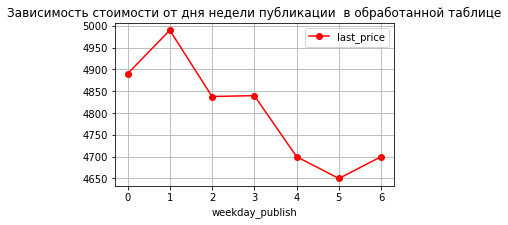

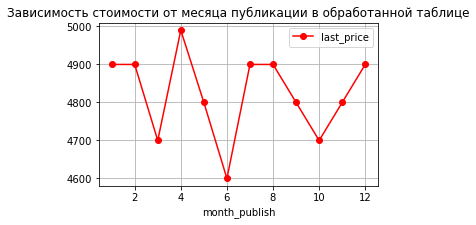

In [75]:
(analytics_df
 .pivot_table(index='weekday_publish', values='last_price', aggfunc='median')
 .plot(style='-or', figsize=(5, 3), title='Зависимость стоимости от дня недели публикации  в обработанной таблице', grid=True)
)
plt.show()

(analytics_df
 .pivot_table(index='month_publish', values='last_price', aggfunc='median')
 .plot(style='-or', figsize=(5, 3), title='Зависимость стоимости от месяца публикации в обработанной таблице', grid=True)
)
plt.show()

По субботам наблюдаются самые низкие цены продажи, самые высокие цены по вторникам. Можно предположить это возникает из за взаимосвязи между свободным временем участников рынка недвижимости и агентов рынка недвижимости. Разницами между крайними значениями цены составляет порядка 350 т.р. График идет на спад со вторника.
В июне наблюдаются самые низкие цены продажи, самые высокие в апреле. Разницами между крайними значениями цены составляет порядка 400 т.р. График имеет форму волны и постоянно находится в росте или падении.

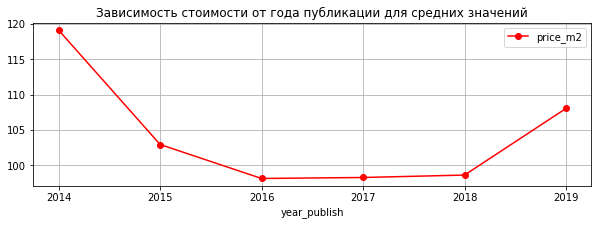

In [76]:
(analytics_df
 .pivot_table(index='year_publish', values='price_m2', aggfunc='mean')
 .plot(style='-or', figsize=(10, 3), title='Зависимость стоимости от года публикации для средних значений', grid=True)
)
plt.show()

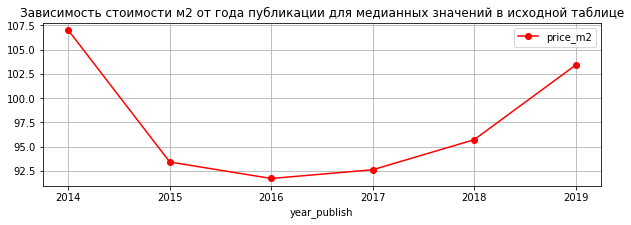

In [77]:
(df
 .pivot_table(index='year_publish', values='price_m2', aggfunc='median')
 .plot(style='-or', figsize=(10, 3), title='Зависимость стоимости м2 от года публикации для медианных значений в исходной таблице', grid=True)
)
plt.show()

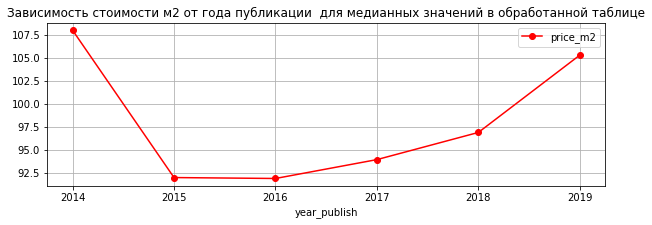

In [78]:
(analytics_df
 .pivot_table(index='year_publish', values='price_m2', aggfunc='median')
 .plot(style='-or', figsize=(10, 3), title='Зависимость стоимости м2 от года публикации  для медианных значений в обработанной таблице', grid=True)
)
plt.show()

### Вывод
Удивительно, как инструмент изучения может влиять на выводы! Вывод о понижении стоимости квартир в шестилетний период с 2014 по 2019 годы оказался не совсем корректным. В действительности в этот период при детальном изучении зависимости стоимости от года публикации выявлено, что в 2014 году был резкий спад стоимости квадратного метра недвижимости, что может быть объяснено политическими событиями на территории Украины, Крыма, Донбаса и РФ и введением санкций западных стран на территорию России. После, по мере стабилизации ситуации в 15 году наблюдаем стагнацию рынка недвижимости в Спб, а далее неуклонный возрастающий рост цены за м2. В последующем цена будет только возрастать вплоть до весны 2022 года, но это уже почва для другого исследования. 

### 4.5 Исследование стоимости квадратного метра в различных районах

In [79]:
locality = (analytics_df
              .groupby('locality_name')['price_m2']
              .agg(['count', 'mean']).round(1)
              .sort_values(by='count', ascending=False)
              .head(10)
             )
display(locality)
print()
print('Самая высокая стоимость (м2):', end='\n')
display(locality.query('mean == mean.max()'))
print()
print('Самая низкая стоимость (м2):', end='\n')
display(locality.query('mean == mean.min()'))

,count,mean
locality_name,,
Санкт-Петербург,9921,113.8
Всеволожск,270,67.4
Пушкин,232,103.7
посёлок Шушары,217,79.5
Колпино,203,75.9
посёлок Мурино,198,87.4
Гатчина,148,70.0
Петергоф,145,85.6
посёлок Парголово,137,90.9



Самая высокая стоимость (м2):


,count,mean
locality_name,,
Санкт-Петербург,9921,113.8



Самая низкая стоимость (м2):


,count,mean
locality_name,,
Всеволожск,270,67.4


### Вывод
- Самая высокая средняя стоимость жилья определена в Санкт-Петербурге в период с 2014 по 2019г: 113,8 т.р. за м2
- Самая низкая средняя стоимость жилья в топ 10 по населению во Всеволожске: 67,4 т.р. за м2
- Самая низкая средняя стоимость жилья в топ 100 в Сланцах: 18т.р. за м2

### 4.6 Определение границы центрального района в Санкт-Петербурге

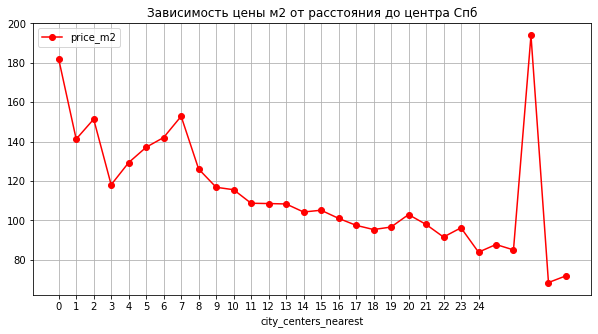

In [80]:
data_spb = analytics_df.query('locality_name == "Санкт-Петербург"').copy()
data_spb['city_centers_nearest'] = data_spb['city_centers_nearest'].round().astype('Int64')
(data_spb
 .pivot_table(index='city_centers_nearest', values='price_m2', aggfunc='mean')
 .plot(style='-or', figsize=(10, 5),  title='Зависимость цены м2 от расстояния до центра Спб', grid=True)
)
plt.xticks(range(25))
plt.show()

### Вывод. 
Центральный район можно определить двумя границами. Первая в границах 3-х км, вторая граница в пределах 8-ми км. Если хотите сэкономить при покупке жилья в историческом центре, то обратите внимание на радиус в 3км от дворцовой площади, но будьте готовы к тому, что эта часть центра не будет являться туристической. Для дальнейшего изучения и большего количества данных обозначим центр в радиусе 8км.

### 4.7 Исследование квартир в центральном районе Санкт-Петербурга

Сохраним в таблице spb_center объявления о квартирах в центре Санкт-петербурга

In [81]:
spb_center = analytics_df.query('locality_name == "Санкт-Петербург" & city_centers_nearest <= 8')

In [82]:
spb_center[['total_area', 'last_price', 'price_m2', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,price_m2,rooms,ceiling_height
count,2264.000000,2264.000000,2264.000000,2264.000000,2264.000000
mean,83.863803,11806.856007,137.438383,2.721290,3.043569
std,37.036618,9542.440151,63.861562,1.208881,0.324732
min,12.000000,1600.000000,16.800000,0.000000,2.400000
25%,56.000000,6550.000000,99.400000,2.000000,2.800000
50%,76.000000,8900.000000,121.750000,3.000000,3.000000
75%,104.000000,13100.000000,152.825000,3.000000,3.200000
max,200.000000,95000.000000,721.500000,8.000000,4.100000


В центре встречаются различные варианты. В среднем это трехкомнатная квартира 76 кв.м, ценой 9-12 млн. руб с  высотой потолков около 3 метров.

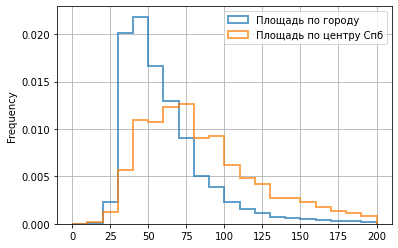

In [83]:
ax = analytics_df.plot(kind = 'hist',
                          y = 'total_area',
                          histtype = 'step',       # данный тип удобен для сравнения двух гистограмм
                          bins = 20,
                          range = (0, 200),
                          alpha = 0.7,
                          linewidth = 2,           # ширина графика
                          grid = True,
                          density = True,          # отобразить плотность распределения данных
                          legend = True,           # отобразить пояснение для графиков
                          label = 'Площадь по городу'  # строка подписи для графиков
                         )
spb_center.plot(kind = 'hist',
                            y = 'total_area',
                            histtype = 'step',
                            ax = ax,               # отобразить график в осях предыдущей гистограммы
                            bins = 20,
                            range = (0, 200),
                            alpha = 0.7,
                            linewidth = 2,
                            grid = True,
                            density = True,
                            legend = True,
                            label = 'Площадь по центру Спб'
                           )
plt.show()

- В центре города гораздо чаще встречается недвижимость с площадью превышающей средние и медианные значения. Об этом свидетельствует хвост красной гистограммы.
- В среднем площадь квартир в центре превышает площадь квартир по городу. 
- Большая часть квартир по городу иеет площадь менее 75 м2, тогда как по центру площади распределены более равномерно и не имеют таких явных частотных пиков.

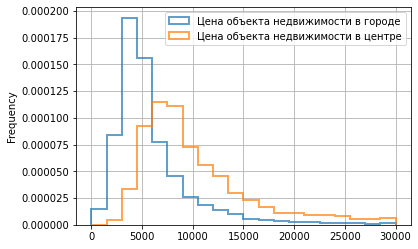

In [84]:
ax = analytics_df.plot(kind = 'hist',
                          y = 'last_price',
                          histtype = 'step',       # данный тип удобен для сравнения двух гистограмм
                          bins = 20,
                          range = (0, 30000),
                          alpha = 0.7,
                          linewidth = 2,           # ширина графика
                          grid = True,
                          density = True,          # отобразить плотность распределения данных
                          legend = True,           # отобразить пояснение для графиков
                          label = 'Цена объекта недвижимости в городе'  # строка подписи для графиков
                         )
spb_center.plot(kind = 'hist',
                            y = 'last_price',
                            histtype = 'step',
                            ax = ax,               # отобразить график в осях предыдущей гистограммы
                            bins = 20,
                            range = (0, 30000),
                            alpha = 0.7,
                            linewidth = 2,
                            grid = True,
                            density = True,
                            legend = True,
                            label = 'Цена объекта недвижимости в центре'
                           )
plt.show()

- Цены на объекты недвижимости по городу преобладают в сравнительно более узком ценовом диапазоне с ярко выраженным пиком на отметке в 4 - 5 млн рублей, тогда как в центре цены от этой отметки скорее только стартуют.  Опять же в центре, как и по параметрам площади, более плавный пик цен относительно общих по городу. 
- Судя по графику большая часть цен на недвижимость сосредоточена в широком ценовом диапазоне, условно можно выделить от 4х до 15 млн р.
- Как итог можно заявить, что недвижимость в центре на порядок дороже, чем в остальном городе.

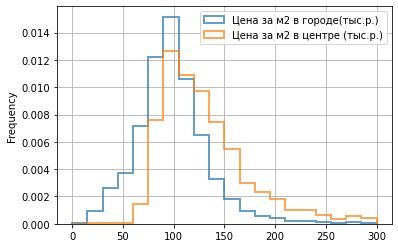

In [85]:
ax = analytics_df.plot(kind = 'hist',
                          y = 'price_m2',
                          histtype = 'step',       # данный тип удобен для сравнения двух гистограмм
                          bins = 20,
                          range = (0, 300),
                          alpha = 0.7,
                          linewidth = 2,           # ширина графика
                          grid = True,
                          density = True,          # отобразить плотность распределения данных
                          legend = True,           # отобразить пояснение для графиков
                          label = 'Цена за м2 в городе(тыс.р.)'  # строка подписи для графиков
                         )
spb_center.plot(kind = 'hist',
                            y = 'price_m2',
                            histtype = 'step',
                            ax = ax,               # отобразить график в осях предыдущей гистограммы
                            bins = 20,
                            range = (0, 300),
                            alpha = 0.7,
                            linewidth = 2,
                            grid = True,
                            density = True,
                            legend = True,
                            label = 'Цена за м2 в центре (тыс.р.)'
                           )
plt.show()

- Можно сказать, что средняя цена за м2 в центре практически совпадает со средней ценой по городу и находится в значениях около 100 т.р. за м2.
- Медианная же цена за м2 по центру ощутимо выше из за смещений распределений в сторону увеличения цены по центру, но разница не критична. Это видно по хвосту гистограммы. Тогда как цены на недвижимость в городе в целом разделены примерно поровну.

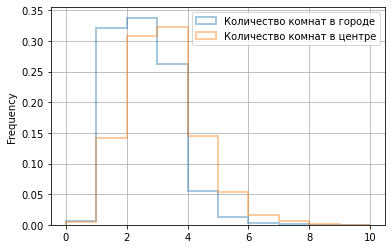

In [86]:
ax = analytics_df.plot(kind = 'hist',
                          y = 'rooms',
                          histtype = 'step',       # данный тип удобен для сравнения двух гистограмм
                          bins = 10,
                          range = (0, 10),
                          alpha = 0.4,
                          linewidth = 2,           # ширина графика
                          grid = True,
                          density = True,          # отобразить плотность распределения данных
                          legend = True,           # отобразить пояснение для графиков
                          label = 'Количество комнат в городе'  # строка подписи для графиков
                         )
spb_center.plot(kind = 'hist',
                            y = 'rooms',
                            histtype = 'step',
                            ax = ax,               # отобразить график в осях предыдущей гистограммы
                            bins = 10,
                            range = (0, 10),
                            alpha = 0.4,
                            linewidth = 2,
                            grid = True,
                            density = True,
                            legend = True,
                            label = 'Количество комнат в центре'
                           )
plt.show()

- Подтверждается информация, которую мы наблюдали в таблице распределения. Чаще всего в центре встречаются трехкомнтаные квартиры. Но почти с той же частотой встречаются и двухкомнатные квартиры. Вместе они занимают порядка 60% распределения значений в общем количестве. Также условные 30 % приблизительно поровну распределены между однокомнатными и четырехкомнатными квартирами. Остальные 10% приходятся на 5, 6, 7, 8 комнатные в порядке убывания. 
- По городу несколько иная ситуация. По частоте появления на рынке лидируют двухкомнатные квартиры и стремятся к 35%, с небольшим отставанием в пару процентов идут 1 комнатные квартиры, и около 26 процентов у трехкомнтаных квартир. Вместе 1, 2 и 3-х комнатные квартиры формируют почти весь рынок в Санкт Петербурге. Оставшаяся доля остальной недвижимости составляет менее 10 процентов суммарно.

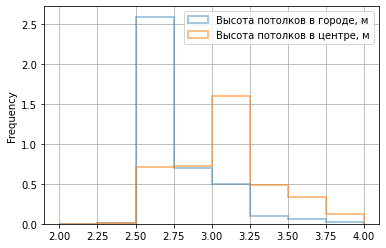

In [87]:
ax = analytics_df.plot(kind = 'hist',
                          y = 'ceiling_height',
                          histtype = 'step',       # данный тип удобен для сравнения двух гистограмм
                          bins = 8,
                          range = (2, 4),
                          alpha = 0.4,
                          linewidth = 2,           # ширина графика
                          grid = True,
                          density = True,          # отобразить плотность распределения данных
                          legend = True,           # отобразить пояснение для графиков
                          label = 'Высота потолков в городе, м'  # строка подписи для графиков
                         )
spb_center.plot(kind = 'hist',
                            y = 'ceiling_height',
                            histtype = 'step',
                            ax = ax,               # отобразить график в осях предыдущей гистограммы
                            bins = 8,
                            range = (2, 4),
                            alpha = 0.5,
                            linewidth = 2,
                            grid = True,
                            density = True,
                            legend = True,
                            label = 'Высота потолков в центре, м'
                           )
plt.show()

- В среднем в центре преобладают потолки высотой 3,2 м. Достаточно часто вречаются и обычные потолки от 2,5 до 3м. Чуть реже встречаются совсем высокие потолки до 4м.
- Тогда как в общем в городе средняя высота потолка находитя в диапазоне от 2,5 до 2,75 м.

In [88]:
price_floor = pd.pivot_table(analytics_df, values='price_m2', index=['category_floor'],  aggfunc=['mean','median'])
price_floor.columns = ['mean','median']
print('Средние и медианные цены за м2 в городе, т.р.:')
display(price_floor)

Средние и медианные цены за м2 в городе, т.р.:


,mean,median
category_floor,,
другой,104.352192,100.00
первый,84.383676,83.40
последний,92.788625,89.45


In [89]:
price_floor_center = pd.pivot_table(spb_center, values='price_m2', index=['category_floor'],  aggfunc=['mean','median'])
price_floor_center.columns = ['mean','median']
print('Средние и медианные цены за м2 в центре, т.р.:')
display(price_floor_center)

Средние и медианные цены за м2 в центре, т.р.:


,mean,median
category_floor,,
другой,142.479673,125.8
первый,119.994186,109.5
последний,129.021103,115.2


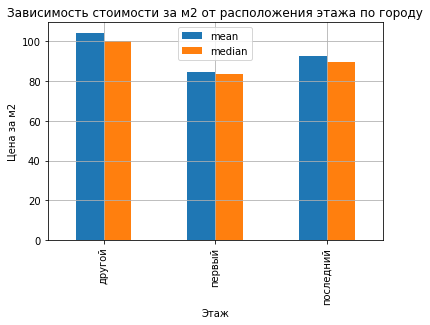

In [90]:
price_floor.plot(kind="bar", title='Зависимость стоимости за м2 от расположения этажа по городу', grid=True);
plt.xlabel('Этаж')
plt.ylabel('Цена за м2')
grid=True

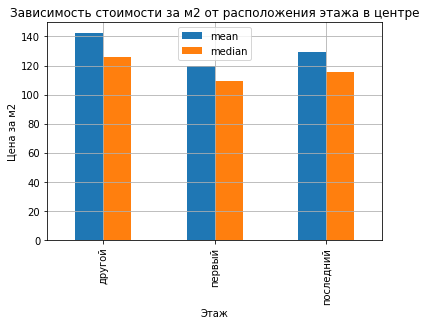

In [91]:
price_floor_center.plot(kind="bar", title='Зависимость стоимости за м2 от расположения этажа в центре', grid=True);
plt.xlabel('Этаж')
plt.ylabel('Цена за м2')
grid=True

### Вывод
- Цены за м2 жилья в центре на приблизительно на 25% выше, чем по городу для всех этажей, кроме крайних. 
- По городу для большинства этажей цена находится в районе 100 т.р. и снижается для крайних этажей. Менее всего ценится первый этаж, он самый дешевый, цена там может опускаться до почти 80 т.р. за м2. В центре наблюдается все то же самое, но цена там во первых выше, во вторых не так сильно выражена разница между ценой на всех этажах.
- Средняя цена по городу для всех этажей немного выше медианной, около 3 т.р. Этот тренд справедлив и для центра города, но там разница между средней и медианой увеличивается на порядок, приблизительно на 17 т.р.
- Как итог можно сказать, что люди склонны не брать квартиры на первых и последних этажах и это подтверждается ценой, которую они готовы платить за свою склонность.

# 5. Общий вывод
В процессе предобработки и исследования данных мы стремились к максимально объективной оценке рыночной стоимости объектов недвижимости в Санкт-Петербурге и пригородах. В исследовании выяснено и подробно описано, какие факторы влияют на стоимость квартиры. Влияние очевидных факторов, таких как  площадь, цена, число комнат, высота потолков подтверждается наглядно гистограммами и диаграммами размаха. Далее составим список интересных выводов и наблюдений:

- По мере увеличения расстояния от центра снижается цена за м2 недвижимости.
- Цена по всему городу отталкивается от цифры 100 т.р. за м2 как в большую, так и меньшую сторону. Самая высокая средняя стоимость жилья ожидаемо определена в Санкт-Петербурге: 113,8 т.р. за м2. Самая низкая средняя стоимость жилья среди 10 самых населенных пунктов во Всеволожске: 67,4 т.р. за м2.
- Первые и последние этажи оцениваются ниже, чем промежуточные, но наиболее явно это выражено в центральном районе города.
- Интересный провал цен был зафиксирован на границе в 3 км от центра. Это можно объяснить отсутствием развитой инфраструктуры в этих районах, например удаленностью от метро, наличием ограниченного количества современных магазинов, а также старым фондом в конце концов.
- В период с 2014 по 2019г самым депрессивным годом оказался 2014 - цены на недвижимость рухнули. В связи с напряженной политической обстановкой произошли структурные изменения в экономике страны, что неизменно отразилось на поведении потребителей. На фоне неопределенности и нестабильности цена на недвижимость сначала упала, несколько лет находилась в стагнации, но тем не менее постепенно возрастала почти до прежних значений. Наиболее ярко выражен рост цен был в 2019 году, что свидетельствовало о готовности людей вкладываться в недвижимость.
- Также определенное влияние на цену оказывает день недели и месяц размещения публикации. По субботам наблюдаются самые низкие цены продажи, самые высокие цены по вторникам. Разницами между крайними значениями цены составляет порядка 350 т.р. В июне наблюдаются самые низкие цены продажи, самые высокие в апреле. Разницами между крайними значениями цены составляет порядка 400 т.р.
- Большинство квартир продаются в срок от 45 до 232 дней.
- Чаще всего в центре встречаются двух и трехкомнатные квартиры, а по городу однокомнатные и двухкомнатные.


На основании проделанного анализа мы подобрали параметры для построения автоматизированной системы поиска аномалий и мошеннической деятельности для недвижимости Санкт-Петербурга и пригородов:
- Общая площадь 12-200 м2;
- Количество комнат 0-5;
- Высота потолков 2,3-4м;
- Цена за м2 жилья - 15-200 тыс. руб.
- Время продажи - до 500 дней.